In [1]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [4]:
my_start = -2e4  
my_stop = 2.01e4 
my_step = 2000.0

my_variables = list(np.arange(my_start, my_stop, my_step))
#my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[-20000.0, -18000.0, -16000.0, -14000.0, -12000.0, -10000.0, -8000.0, -6000.0, -4000.0, -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0]
21


### Load the data

In [20]:
path_to_data = './'
QpxQpy="1"
study_name = f'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsONvsOFF_QpxQpy{QpxQpy}_ayyScanlong_quadOnly' # title for save figures
study_name_1 = f'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_Nowakes_QpxQpy1_ayyScan'
study_name_2 = f'deyRates_sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_complete_quadOnly_QpxQpy{QpxQpy}_ayyScan'
noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [21]:
my_df_2

,ayy_-20000.0,ayy_-18000.0,ayy_-16000.0,ayy_-14000.0,ayy_-12000.0,ayy_-10000.0,ayy_-8000.0,ayy_-6000.0,ayy_-4000.0,ayy_-2000.0,...,ayy_2000.0,ayy_4000.0,ayy_6000.0,ayy_8000.0,ayy_10000.0,ayy_12000.0,ayy_14000.0,ayy_16000.0,ayy_18000.0,ayy_20000.0
m,"[2.5055152094413337e-08, 2.6368993544050768e-0...","[2.5424968896255492e-08, 2.6705998510682805e-0...","[2.539666866080438e-08, 2.709797676469634e-08,...","[2.5968139865815313e-08, 2.772559779369864e-08...","[2.598153834243775e-08, 2.798547537129049e-08,...","[2.568414083883595e-08, 2.90052966758204e-08, ...","[2.5751486221400985e-08, 3.006348514803612e-08...","[2.5445215122396423e-08, 3.1277977400048334e-0...","[2.46699843763234e-08, 3.064856072195796e-08, ...","[2.420760584604567e-08, 2.6764643237870863e-08...",...,"[2.9766833242025547e-08, 2.388756197172009e-08...","[3.139472851813134e-08, 2.581567628468387e-08,...","[3.1866125303874856e-08, 2.7393930217719514e-0...","[3.1539139356920695e-08, 2.8230992431994265e-0...","[3.091264251717898e-08, 2.801665257572522e-08,...","[3.00492587149807e-08, 2.79628368751081e-08, 2...","[2.8540063937977763e-08, 2.772684348960839e-08...","[2.7941392403478775e-08, 2.681275949239027e-08...","[2.687066251404946e-08, 2.6538070361943744e-08...","[2.6551989887747973e-08, 2.6451613257341735e-0..."
b,"[2.00272486114098e-06, 1.9990704652450652e-06,...","[1.999783981443461e-06, 1.9954477488703945e-06...","[1.9967096524310353e-06, 1.995201948424395e-06...","[2.0029273846386283e-06, 1.9931751992162185e-0...","[1.999341419154567e-06, 1.9926418708689193e-06...","[2.0034519910517452e-06, 1.995967509792732e-06...","[2.000023089303335e-06, 1.9937335907633852e-06...","[1.9982299023911844e-06, 1.9918877763428515e-0...","[2.003147443562813e-06, 1.9890542317042133e-06...","[2.0033698650621904e-06, 1.9924684498414025e-0...",...,"[1.996598069398139e-06, 2.00305624213755e-06, ...","[1.9981874145663335e-06, 2.00134021683942e-06,...","[2.001074290105188e-06, 2.000867515016463e-06,...","[2.0018810510859313e-06, 1.999018793092754e-06...","[1.9987300694380784e-06, 1.997458364511032e-06...","[1.999019664874069e-06, 1.9969454637380128e-06...","[2.0021609621566542e-06, 2.0003144339618774e-0...","[2.0010283395720314e-06, 1.9988066352255635e-0...","[2.000758806868219e-06, 1.998148748775068e-06,...","[2.0010029663476426e-06, 1.996831208802631e-06..."
err,"[3.686190738853198e-11, 6.010736866686657e-11,...","[4.109577263527741e-11, 6.456762229896533e-11,...","[4.424521867506778e-11, 7.859613994023753e-11,...","[4.6067576840206405e-11, 8.262098352134857e-11...","[5.0967145815544895e-11, 1.0195712678808992e-1...","[5.407062396887328e-11, 1.2248302044198614e-10...","[6.377788091791183e-11, 1.4365686135640133e-10...","[7.206810364505217e-11, 1.8180395196089583e-10...","[9.082285160325808e-11, 2.1716017239564113e-10...","[1.4170782678335446e-10, 2.4442010272351817e-1...",...,"[1.9966028831853851e-10, 1.204848421086298e-10...","[1.6069937440573944e-10, 1.1172613984710596e-1...","[1.3852095574121524e-10, 9.273248878990146e-11...","[1.2376926560566388e-10, 8.38595157695698e-11,...","[1.0542325645823171e-10, 7.558139194644766e-11...","[8.915913959936694e-11, 6.543108887882262e-11,...","[7.934349278549338e-11, 6.03763899351787e-11, ...","[7.335068713049168e-11, 4.9407522624820807e-11...","[6.071390803710993e-11, 4.642274605693653e-11,...","[5.851763743528103e-11, 3.814657765509423e-11,..."


In [22]:
my_df_keys = list(my_df_2.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_-20000.0', 'ayy_-18000.0', 'ayy_-16000.0', 'ayy_-14000.0', 'ayy_-12000.0', 'ayy_-10000.0', 'ayy_-8000.0', 'ayy_-6000.0', 'ayy_-4000.0', 'ayy_-2000.0', 'ayy_0.0', 'ayy_2000.0', 'ayy_4000.0', 'ayy_6000.0', 'ayy_8000.0', 'ayy_10000.0', 'ayy_12000.0', 'ayy_14000.0', 'ayy_16000.0', 'ayy_18000.0', 'ayy_20000.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

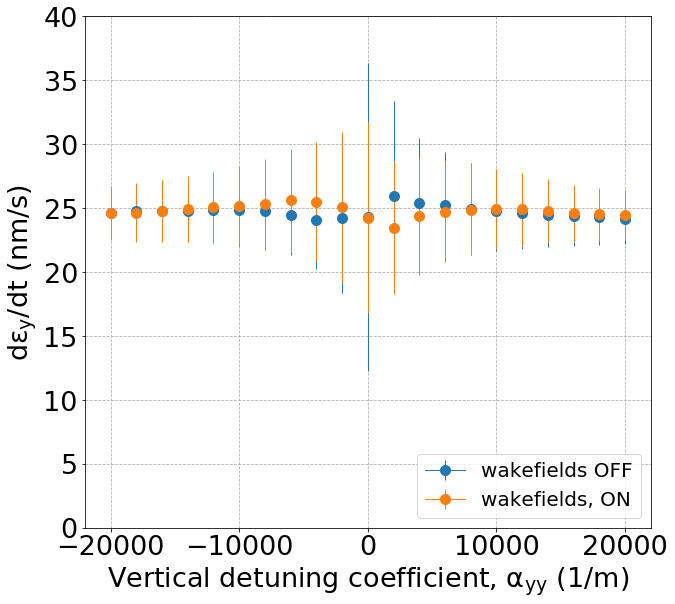

In [23]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    
plt.legend(loc=4)

#plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [24]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [25]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 23.813362141833874 nm/s


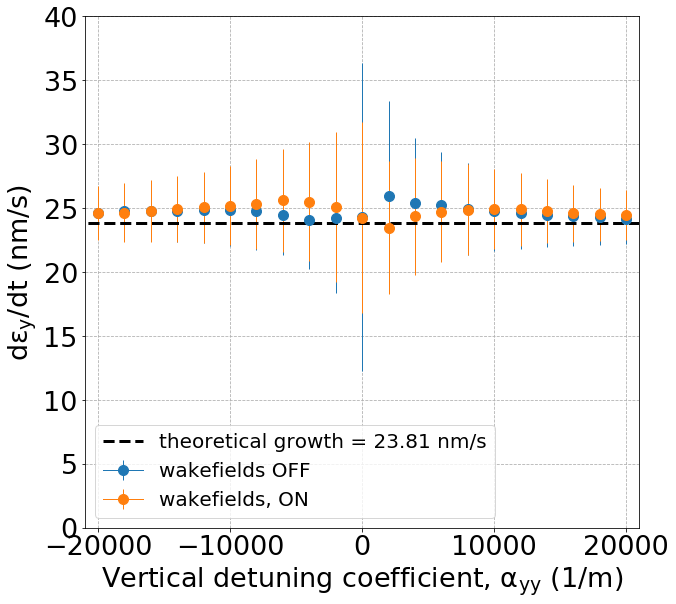

In [26]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

plt.hlines(expected_growth*1e9, -22000., 22000., linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.legend(loc=3)

plt.xlim(-21000, 21000)
plt.ylim(0, 40)

plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute the rms detuning with amplitude

In [27]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_bunch = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
path_to_bunch='./'
bunch = pickle.load(open(path_to_bunch+'bunch', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

In [28]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=6.9400568591152065e-09 m
rms(Jy)=6.936692592779671e-09 m


In [29]:
Dqy_rms = []
axy=0
for ayy in my_variables:
    Dqy_rms.append(rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy))

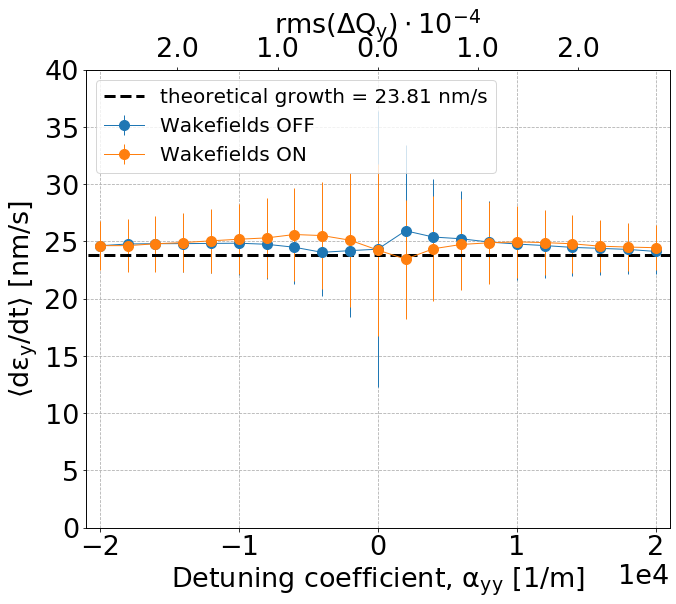

In [30]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'Wakefields OFF'
        my_label_2 = 'Wakefields ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')



ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=2)

ax2.set_xlim(-2*21000*rms_Jy_init*1e4, 2*21000*rms_Jy_init*1e4)
ax.set_xlim(-21000, 21000)


labels = ax.get_xticks()
ax2.set_xticklabels(abs(labels*1e-4))

ax.set_ylim(0, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpread_v2.png', bbox_inches='tight')

### Plot expected rms amplitude detuning of SPS for the current settings
- b3b5b7 included 
- chroma match at the current setting (contribution from the chromatic sextupoles)
- klof=klod=1 $1/m^4$
- axy and ayy values as shown below are obtained from MAD-X
    link to script: https://github.com/natriant/exploring_SPS/blob/master/coherent_and_incoherent_tuneShift/job000_cmpt_SPS_detuning_ceofficients_madx.ipynb

In [31]:
if QpxQpy == "0":  
    axy_sps = -1484.124066 # for Qpx=Qpy=0
    ayy_sps = 1082.073444 # for Qpx=Qpy=0
elif QpxQpy == "5e-1":  
    axy_sps = -1497.189826 # for Qpx=Qpy=0.5
    ayy_sps = 1081.203394 # for Qpx=Qpy=0.5
elif  QpxQpy == "1":  
    axy_sps = -1510.465536 # for Qpx=Qpy=1
    ayy_sps = 1080.331794 # for Qpx=Qpy=1
elif QpxQpy=="25e-1":
    axy_sps= -1551.55237 # for Qpx=Qpy=2.5
    ayy_sps = 1077.707686 # for Qpx=Qpy=2.5
elif QpxQpy=="5":
    axy_sps = -1624.229435 # for Qpx=Qpy=5
    ayy_sps = 1073.303156 # for Qpx=Qpy=5
print(axy_sps, ayy_sps)

-1510.465536 1080.331794


In [32]:
Dqy_rms_sps = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy_sps, axy_sps)
print(Dqy_rms_sps)

2.5767755375923537e-05


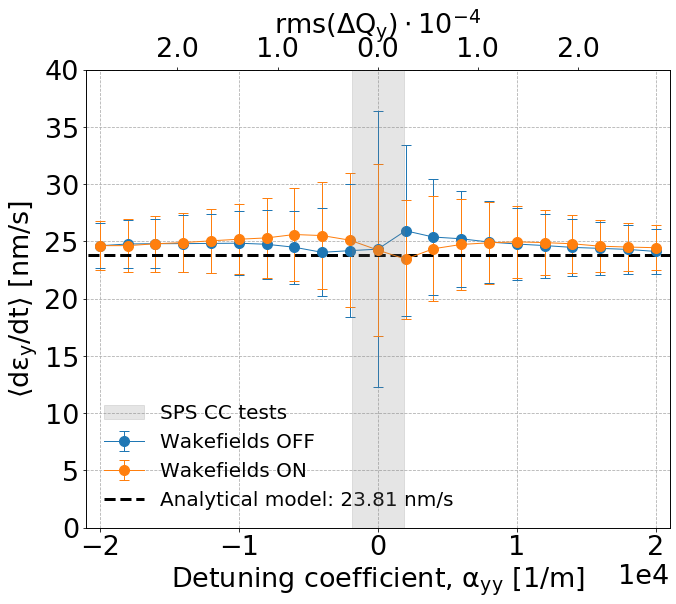

In [34]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()


points_wakes = []
points_no_wakes = []

for i, key in enumerate(my_df_keys):
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i ==0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1')
        
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')

ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')


theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

# Plot SPS tune spread from MAD-X
#ax2.plot(Dqy_rms_sps*1e4, 11.5, 'o', c='k', label=r'$\mathrm{rms(\Delta Qy)}=$'+f'{Dqy_rms_sps*1e4:.2f} '+r'$\mathrm{10^{-4}}$'+'\nexpected for SPS')
ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory])
#ax.legend(loc=3, frameon=False)
ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.3), frameon=False)


ax2.set_xlim(-2*21000*rms_Jy_init*1e4, 2*21000*rms_Jy_init*1e4)
ax.set_xlim(-21000, 21000)


labels = ax.get_xticks()
ax2.set_xticklabels(abs(labels*1e-4))

ax.set_ylim(0, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$')

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpread_expectedSPS.png', bbox_inches='tight')